In [2]:
from Controller import TrainingController, ExplainingController
from Utils.SaveUtils import load_parameters
from Parameters import TrainingParameters, PredictingParameters
import tensorflow as tf
from IPython.core.display import display, HTML
import json
import numpy as np
from Parameters.Enums import TracePermutationStrategies


In [3]:
folder_path = "./SavedModels/%s" % (
# "0.8569_BPI2012_BaseLineLSTMModel_2021-05-28 19:02:39.442554" # OW
"0.8324_BPI2012_BaseLineLSTMModel_2021-06-05 15:19:51.992793" # W
)   

In [4]:
parameters_json = load_parameters(folder_path=folder_path)
parameters = TrainingParameters(**parameters_json)
tf.random.set_seed(parameters.dataset_split_seed)
np.random.seed(parameters.dataset_split_seed)
parameters.load_model_folder_path = folder_path
predicting_parameters = PredictingParameters()
predicting_parameters.load_model_folder_path = folder_path

In [5]:
trainer = TrainingController(parameters = parameters)


| Running on /job:localhost/replica:0/task:0/device:CPU:0  

| Preprocessed data loaded successfully: ./datasets/preprocessed/BPI_Challenge_2012/W 

| Model loaded successfully from: ./SavedModels/0.8324_BPI2012_BaseLineLSTMModel_2021-06-05 15:19:51.992793  


In [7]:
explainer = ExplainingController(parameters=parameters, predicting_parameters= predicting_parameters)


| Running on /job:localhost/replica:0/task:0/device:CPU:0  

| Model loaded successfully from: ./SavedModels/0.8324_BPI2012_BaseLineLSTMModel_2021-06-05 15:19:51.992793  


In [6]:
########### Get example data from trainer ###########
unbatch_test = trainer.test_dataset.unbatch()
print("Test set length: %d" %(len(list(unbatch_test.as_numpy_iterator()))))
index_from_test = 45

Test set length: 965


In [7]:
example_trace = trainer.dataset.collate_fn([list(unbatch_test.as_numpy_iterator())[index_from_test]])[1][0]
##### Take part of it
example_trace = example_trace[:7]
print(example_trace)

[ 2  4  5 10  3 11  9]


In [8]:
example_trace = trainer.model.vocab.list_of_index_to_vocab(example_trace.tolist())

In [9]:
explainer.show_model_info()

Model: "baseline_lstm_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      multiple                  704       
_________________________________________________________________
lstm_1 (LSTM)                multiple                  24832     
_________________________________________________________________
sequential_1 (Sequential)    (1, 1, 22)                1686      
Total params: 27,222
Trainable params: 27,094
Non-trainable params: 128
_________________________________________________________________

| Loaded model has been trained for [3050] steps, [50] epochs 


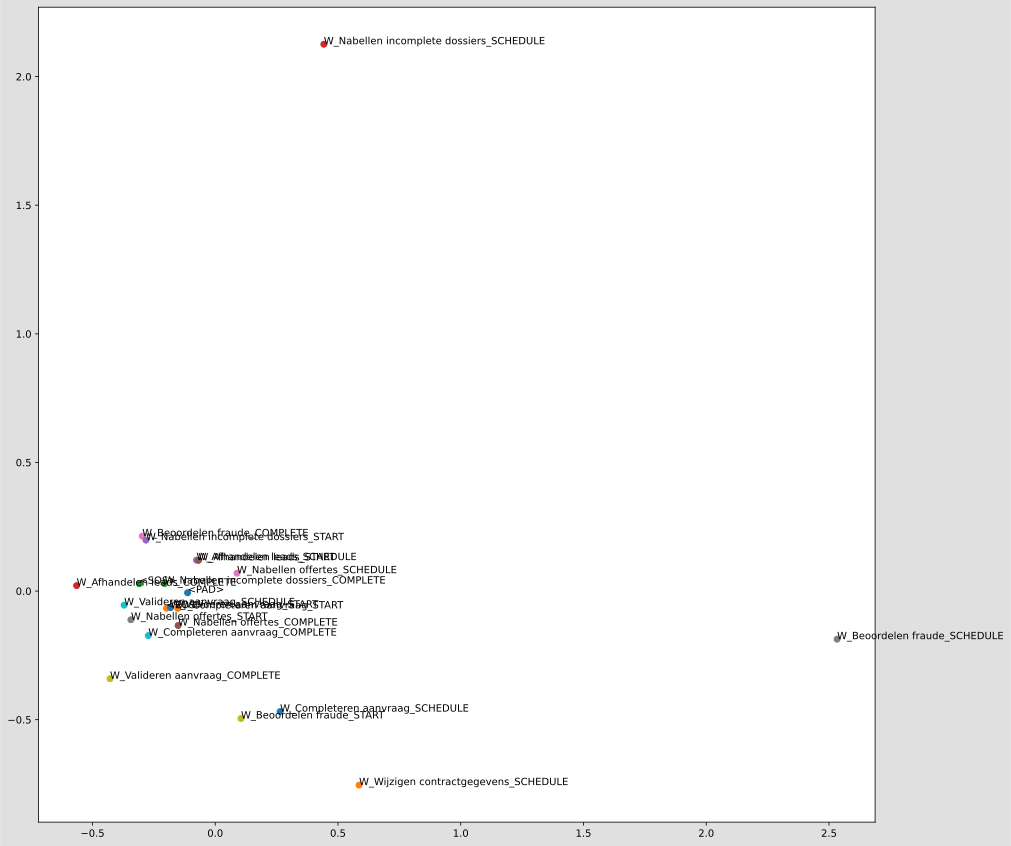

In [10]:
explainer.model.plot_embedding_layer_pca()

In [11]:
df, data_predicted_list, bn, bn_html, inference, target_inference, infoBN, markov_blanket_html = explainer.pm_predict_lindaBN_explain(example_trace,permutation_strategy= TracePermutationStrategies.SampleFromEmbeddingDistance, sample_size=200, n_steps=3)


| Selecting Greedy Hill Climbing Algorithm 


In [12]:
generated_html = explainer.generate_html_page_from_graphs(json.dumps(example_trace), json.dumps(data_predicted_list), bn_html, inference,target_inference, infoBN, markov_blanket_html)
display(HTML(generated_html))